[[0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  0.00000000e+000 0.00000000e+000 4.25587825e-001 1.14816410e-318
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
  2.63267632e-118 5.19916195e-001 6.68551367e-001 6.65053276e-001
  0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 8.11415478e-210 6.87358445e-001
  7.49237388e-001 6.62022351e-001 8.03236881e-001 7.93555856e-001
  1.50364771e-033 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 8.11415478e-210 6.87358445e-001
  7.49237388e-001 6.62022351e-001 8.03236881e-001 7.93555856e-001
  1.50364771e-033 0.00000000e+000

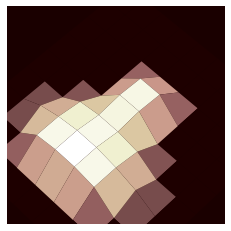

In [31]:
import matplotlib.pyplot as plt # import matplotlib modules
import numpy as np
from julia_and_mandelbrot_functions import *

julia_set_frames(x_pixels = 1000, iterations = 20)

fig = plt.figure() # set 3D figure environment
ax = plt.axes(projection = '3d')
ax.view_init(60, 45) # set view orientation (azim, elevation)
ax.dist = 5.0 # set viewpoint distance
ax.set_facecolor([.1,0.0,0.0]) # set ground color
n = 8 # set number of cycles
dx = -0.7 # set initial x parameter shift
dy = 0.0 # set initial y parameter shift
L = 1.5 # set square area side
M = 10 # set side number of pixels
def f(Z): # def scale damping of the elevation function
    return np.e**(-np.abs(Z))

x = np.linspace(-L+dx,L+dx,M) # x variable array
y = np.linspace(-L+dy,L+dy,M) # y variable array
X,Y = np.meshgrid(x,y) # square area grid
Z = np.zeros(M) # complex plane starting points area
W = np.zeros((M,M)) # zero matrix of elevation values
C = X + 1j*Y # complex plane area
for k in range(1,n+1): # recursion cycle
    ZZ = Z**2 + C
    Z = ZZ
    W = f(Z) # smoothed sum modul


ax.set_xlim(dx-L,dx+L) # set x axis limits
ax.set_zlim(dy-L,dy+L) # set y axis limits
ax.set_zlim(-L,2*L) # set z axis limits

ax.axis("off") # do not plot axes
ax.plot_surface(X, Y, W, rstride=1, cstride=1, cmap="pink") # plot surface as a whole
print(W)

/var/folders/rr/grm87jvx0gg_w0l6v0_pb8xc0000gn/T/ipykernel_52377/3917881671.py:20: RuntimeWarning: overflow encountered in square
  Z = Z ** 2 + c
/var/folders/rr/grm87jvx0gg_w0l6v0_pb8xc0000gn/T/ipykernel_52377/3917881671.py:20: RuntimeWarning: invalid value encountered in square
  Z = Z ** 2 + c
/var/folders/rr/grm87jvx0gg_w0l6v0_pb8xc0000gn/T/ipykernel_52377/3917881671.py:17: RuntimeWarning: overflow encountered in absolute
  return np.e**(-np.abs(Z))


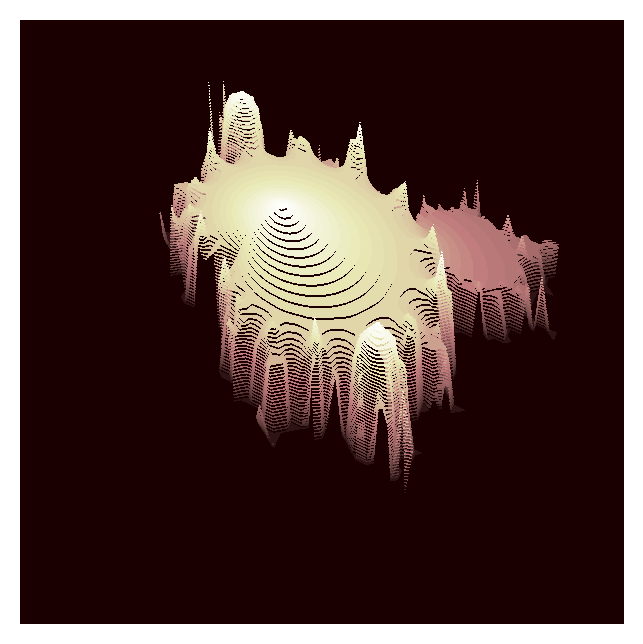

In [116]:

def julia_set_frames_3d(c = 0.28 + 0.008j, x_pixels = 1000, limits = [-2, 2, -4/3, 4/3], iterations = 30):
    '''
    '''
    if c == 0:
        limits = [-2, 1.5, -7/6, 7/6]
    y_pixels = round(x_pixels * ((limits[3] - limits[2])/(limits[1 ]- limits[0])))
    x = np.linspace(limits[0], limits[1], x_pixels)
    y = np.linspace(limits[2], limits[3], y_pixels)
    X, Y = np.meshgrid(x, y)

    iteration_array = np.zeros((iterations, y_pixels, x_pixels)) # np.zeros allows floats

    Z = X + Y * 1j
    if c == 0:
        c = Z
    def f(Z): # scaling for each recursion (reduces deviation between output values)
        return np.e**(-np.abs(Z))

    for i in range(iterations):
        Z = Z ** 2 + c
        iteration_array[i] = f(Z)

    return X, Y, iteration_array

def plot_3d_julia_frame(X, Y, iteration_array, frame = 20,  dpi = 200, view = [35, 72], mountain = True, plot_type = 'meshplot', face_colour = [0.1, 0, 0], cmap = 'pink'):
    '''
    '''
    fig = plt.figure(dpi = dpi) # set 3D figure environment
    ax = plt.axes(projection = '3d')
    ax.set_zlim(-2, 2)
    ax.view_init(view[0], view[1]) # view orientation (elevation angle, horizontal angle)
    ax.dist = 5 # viewpoint distance
    ax.set_facecolor(face_colour) # background colour
    ax.axis("off")
    if mountain == False:
        iteration_array = - iteration_array

    if plot_type == 'meshplot':
            ax.plot_surface(X, Y, iteration_array[frame - 1], rstride = 1, cstride = 1, cmap = cmap)
    elif plot_type == 'contourplot':
        ax.contourf3D(X, Y, iteration_array[frame - 1], 2*frame, cmap = cmap)
        
    plt.show();

X, Y, iteration_array = julia_set_frames_3d(c = 0, x_pixels = 100, iterations =40)
plot_3d_julia_frame(X, Y, iteration_array, plot_type = 'contourplot', mountain = True)